In [1]:
!pip install seaborn

You should consider upgrading via the 'c:\users\91892\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install plotly

You should consider upgrading via the 'c:\users\91892\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
aqi_df = pd.read_csv(r"E:\Air-Pure\aqi.csv")
idsp_df = pd.read_csv(r"E:\Air-Pure\idsp.csv", encoding='latin1')
vahan_df = pd.read_csv(r"E:\Air-Pure\vahan.csv")

In [7]:
aqi_df_copy = aqi_df
aqi_df_copy .head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [14]:
southern_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']
southern_df = aqi_df_copy[ aqi_df_copy['state'].isin(southern_states)]
southern_df.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,year_month
6,2025-04-30,Kerala,Kollam,1,PM10,73,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04
10,2025-04-30,Karnataka,Hubballi,1,PM10,46,Good,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04
13,2025-04-30,Tamil Nadu,Vellore,1,PM10,51,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04


In [16]:
pollutant_counts = southern_df.groupby(['state','prominent_pollutants']).size().reset_index(name='count')
pollutant_counts.head(3)

,state,prominent_pollutants,count
0,Andhra Pradesh,CO,520
1,Andhra Pradesh,"CO,NO2",25
2,Andhra Pradesh,"CO,O3",7


In [29]:
top_prominent_pollutants = pollutant_counts.groupby('state').apply(lambda x:x.nlargest(2,'count')).reset_index(drop=True)
top_prominent_pollutants

,state,prominent_pollutants,count
0,Andhra Pradesh,PM10,3182
1,Andhra Pradesh,PM2.5,1757
2,Karnataka,PM10,13404
3,Karnataka,CO,2913
4,Kerala,PM10,3167
5,Kerala,PM2.5,1123
6,Tamil Nadu,PM10,6253
7,Tamil Nadu,PM2.5,2268
8,Telangana,"PM2.5,PM10",343
9,Telangana,PM10,315


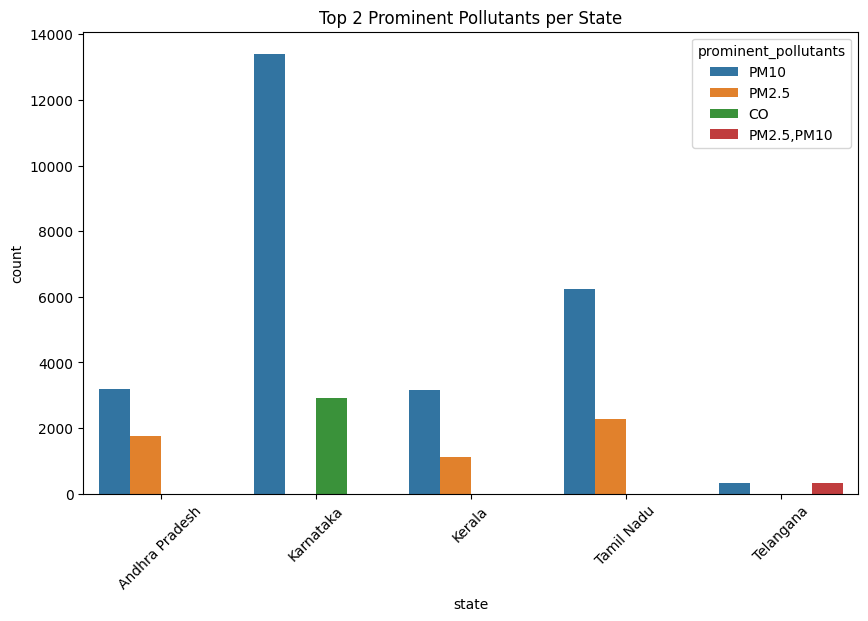

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_prominent_pollutants,
    x='state',
    y='count',
    hue='prominent_pollutants'
)
plt.xticks(rotation=45)
plt.title('Top 2 Prominent Pollutants per State')
plt.show()

In [31]:
top_prominent_pollutants.to_excel("top_prominent_pollutants.xlsx", index=False)

In [35]:
bottom_prominent_pollutants = pollutant_counts.groupby('state').apply(lambda x:x.nsmallest(2,'count')).reset_index(drop=True)
bottom_prominent_pollutants

,state,prominent_pollutants,count
0,Andhra Pradesh,"PM10,NO2,O3",1
1,Andhra Pradesh,"PM10,NO2,PM2.5,O3",1
2,Karnataka,"NO2,O3",1
3,Karnataka,"NO2,SO2,CO",1
4,Kerala,"CO,O3",6
5,Kerala,SO2,7
6,Tamil Nadu,"PM10,NH3,CO",1
7,Tamil Nadu,"PM10,NO2,PM2.5,O3",1
8,Telangana,"CO,O3",1
9,Telangana,NO2,1


In [36]:
bottom_prominent_pollutants.to_excel("bottom_prominent_pollutants.xlsx", index=False)

In [32]:
import os
print(os.getcwd())

C:\Users\91892


In [33]:
from pandas import Timestamp
one_year_ago = Timestamp.today() - pd.DateOffset(years=1)
aqi_1year = aqi_df_copy[aqi_df_copy['date']>=one_year_ago]

In [45]:
metro_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']
aqi_metros = aqi_1year[aqi_1year['area'].isin(metro_cities)].copy()
aqi_metros.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,year_month
11,2025-04-30,Gujarat,Ahmedabad,8,"PM2.5,PM10",110,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04
34,2025-04-30,Tamil Nadu,Chennai,7,"PM10,O3,CO",46,Good,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04
92,2025-04-30,West Bengal,Kolkata,6,"PM10,NO2",65,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04


In [46]:
aqi_metros['day_type'] = aqi_metros['date'].dt.dayofweek.apply(lambda x : 'weekend' if x >= 5 else "weekday")

In [47]:
aqi_metros.head(5)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,year_month,day_type
11,2025-04-30,Gujarat,Ahmedabad,8,"PM2.5,PM10",110,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,weekday
34,2025-04-30,Tamil Nadu,Chennai,7,"PM10,O3,CO",46,Good,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,weekday
92,2025-04-30,West Bengal,Kolkata,6,"PM10,NO2",65,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,weekday
95,2025-04-30,Telangana,Hyderabad,11,"PM2.5,PM10",74,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,weekday
99,2025-04-30,Karnataka,Bengaluru,13,"PM2.5,PM10",84,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,weekday


In [48]:
aqi_comparison = aqi_metros.groupby(['area','day_type'])['aqi_value'].mean().reset_index()
print(aqi_comparison)

         area day_type   aqi_value
0   Ahmedabad  weekday  120.414894
1   Ahmedabad  weekend  122.881579
2   Bengaluru  weekday   78.367021
3   Bengaluru  weekend   78.184211
4     Chennai  weekday   73.042553
5     Chennai  weekend   68.368421
6       Delhi  weekday  228.989362
7       Delhi  weekend  212.684211
8   Hyderabad  weekday   84.867021
9   Hyderabad  weekend   84.894737
10    Kolkata  weekday  107.015957
11    Kolkata  weekend  106.513158
12     Mumbai  weekday  103.489362
13     Mumbai  weekend  105.644737
14       Pune  weekday  114.170213
15       Pune  weekend  112.473684


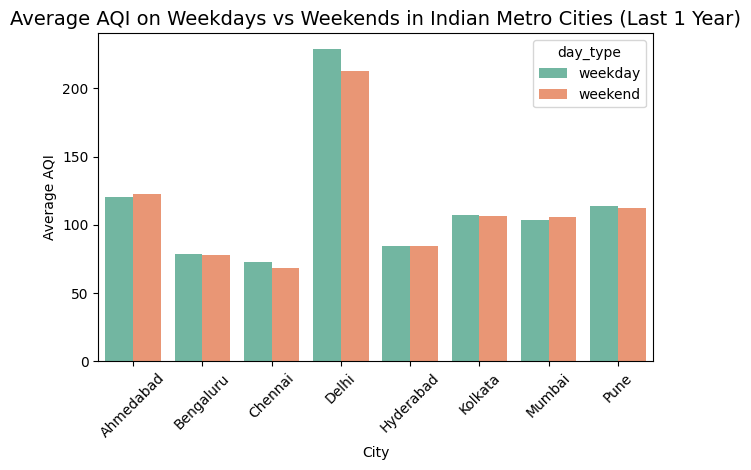

In [49]:
sns.barplot(data=aqi_comparison, x='area',y='aqi_value',hue='day_type', palette='Set2' )
plt.title('Average AQI on Weekdays vs Weekends in Indian Metro Cities (Last 1 Year)', fontsize=14)
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [51]:
aqi_comparison.to_excel("aqi_comparison1.xlsx", index=False)

In [59]:
aqi_df_copy['month_name'] = aqi_df_copy['date'].dt.strftime('%B')
top_states = aqi_df_copy.groupby('state')['area'].nunique().sort_values(ascending=False).head(10).index
top_states

Index(['Rajasthan', 'Maharashtra', 'Karnataka', 'Tamil Nadu', 'Bihar',
       'Haryana', 'Uttar Pradesh', 'Odisha', 'Madhya Pradesh',
       'Andhra Pradesh'],
      dtype='object', name='state')

In [60]:
top_states_df = aqi_df_copy[aqi_df_copy['state'].isin(top_states)].copy()
top_states_df.head(4)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,year_month,month_name
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,April
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,April
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,April
8,2025-04-30,Odisha,Nayagarh,1,PM10,58,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,April


In [62]:
monthly_avg_aqi = top_states_df.groupby(['state', 'month_name'])['aqi_value'].mean().reset_index()


In [64]:
worst_months_per_state = (
    monthly_avg_aqi
    .groupby('state', group_keys=False)
    .apply(lambda x: x.sort_values(by='aqi_value', ascending=False).head(1))
    .reset_index(drop=True)
)
worst_months_per_state 

,state,month_name,aqi_value
0,Andhra Pradesh,January,114.737649
1,Bihar,December,251.805770
2,Haryana,November,239.460372
3,Karnataka,February,76.640530
4,Madhya Pradesh,November,164.537452
5,Maharashtra,November,158.832972
6,Odisha,January,193.607264
7,Rajasthan,November,193.222376
8,Tamil Nadu,January,90.175020
9,Uttar Pradesh,November,200.607203


In [66]:
worst_months_per_state.to_excel("Worst_Months_per_stat.xlsx", index=False)

In [69]:
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

In [70]:
bengaluru_df = aqi_df_copy[
    (aqi_df_copy['area'].str.lower() == 'bengaluru') &
    (aqi_df_copy['date'].dt.year == 2025) &
    (aqi_df_copy['month_name'].isin(['March', 'April', 'May']))
].copy()


In [71]:
bengaluru_df['air_quality_status'] =  bengaluru_df['aqi_value'].apply(classify_aqi)

In [78]:
Banglore_category_counts = bengaluru_df.groupby('air_quality_status')['date'].nunique().reset_index()
Banglore_category_counts.columns = ['Air Quality Category', 'Number of Days']
print(Banglore_category_counts)

  Air Quality Category  Number of Days
0             Moderate              13
1         Satisfactory              48


In [79]:
Banglore_category_counts.to_excel("Banglore_category_counts.xlsx",index=False)

KeyError: 'disease_illness_name'

In [85]:
idsp_df_copy = idsp_df
idsp_df_copy.head(3)

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN


In [86]:
disease_counts = (idsp_df_copy.groupby(['state', 'disease_illness_name']).size().reset_index(name='count'))
disease_counts.head(3)

,state,disease_illness_name,count
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,3
1,Andaman and Nicobar Islands,Chickenpox,1
2,Andaman and Nicobar Islands,Fever with Rash,1


In [92]:
top2_diseases = (
    disease_counts.groupby('state', group_keys=False)
    .apply(lambda x: x.sort_values(by='count', ascending=False).head(2))
    .reset_index(drop=True)
)

In [93]:
avg_aqi = (
    aqi_df_copy.groupby('state')['aqi_value']
    .mean()
    .reset_index()
    .rename(columns={'aqi_value': 'avg_aqi'})
)

In [94]:
final_result = pd.merge(top2_diseases, avg_aqi, on='state', how='left')
print(final_result)

                          state     disease_illness_name  count     avg_aqi
0   Andaman and Nicobar Islands  Acute Diarrheal Disease      3   57.706897
1   Andaman and Nicobar Islands               Chickenpox      1   57.706897
2                Andhra Pradesh  Acute Diarrheal Disease     91   77.507701
3                Andhra Pradesh           Food Poisoning     25   77.507701
4                     Arunachal                   Rabies      1         NaN
..                          ...                      ...    ...         ...
71                Uttar Pradesh           Food Poisoning     46  126.424036
72                  Uttarakhand  Acute Diarrheal Disease     16   87.898799
73                  Uttarakhand                   Dengue      7   87.898799
74                  West Bengal  Acute Diarrheal Disease     81  114.192891
75                  West Bengal           Food Poisoning     42  114.192891

[76 rows x 4 columns]


In [97]:
final_result.to_excel("final_result.xlsx",index=False)

In [96]:
vahan_df_copy = vahan_df
vahan_df_copy.head(2)

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN


In [98]:
ev_only = vahan_df_copy[vahan_df_copy['fuel'].str.lower().str.strip() == 'pure ev']
ev_only.head(5)

,year,month,state,rto,vehicle_class,fuel,value,unit,note
6,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PURE EV,2,value in Absolute Number,NaN
16,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,MOTOR CAR,PURE EV,3,value in Absolute Number,NaN
33,2025,April,Andhra Pradesh,All Vahan Running Office,E-RICKSHAW WITH CART (G),PURE EV,1,value in Absolute Number,NaN
35,2025,April,Andhra Pradesh,All Vahan Running Office,E-RICKSHAW(P),PURE EV,2,value in Absolute Number,NaN
45,2025,April,Andhra Pradesh,All Vahan Running Office,GOODS CARRIER,PURE EV,8,value in Absolute Number,NaN


In [99]:
ev_by_state = ev_only.groupby('state')['value'].sum().reset_index()

In [100]:
top_5_ev_states = ev_by_state.sort_values(by='value', ascending=False).head(5)

print(top_5_ev_states)


             state   value
19     Maharashtra  162298
31   Uttar Pradesh  115660
15       Karnataka   95971
29      Tamil Nadu   70850
18  Madhya Pradesh   64995


In [105]:
top_5_ev_states.to_excel("top_5_ev_states.xlsx",index=False)

In [101]:
aqi_by_state = aqi_df_copy.groupby('state')['aqi_value'].mean().reset_index()


In [102]:
aqi_by_state['Category'] = aqi_by_state['state'].apply(
    lambda x: 'Top 5 EV' if x in top_5_ev_states['state'].values else 'Other'
)

In [104]:
aqi_EV_comparison = aqi_by_state.groupby('Category')['aqi_value'].mean().reset_index()
print(aqi_EV_comparison)

   Category   aqi_value
0     Other  103.121506
1  Top 5 EV   93.842172


In [106]:
aqi_EV_comparison.to_excel("aqi_EV_comparison.xlsx",index=False)

C:\Users\91892\AppData\Local\Temp\ipykernel_11036\4172751971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aqi_comparison, x='Category', y='aqi_value', palette='viridis')


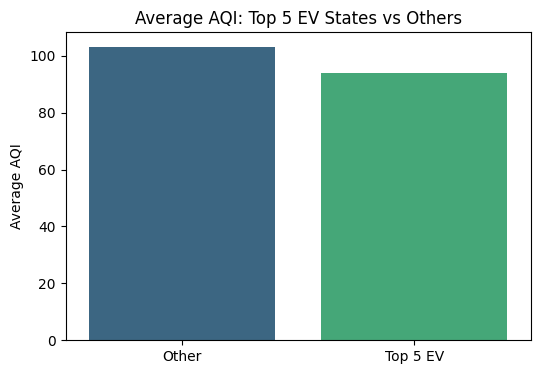

In [107]:
plt.figure(figsize=(6,4))
sns.barplot(data=aqi_comparison, x='Category', y='aqi_value', palette='viridis')
plt.title('Average AQI: Top 5 EV States vs Others')
plt.ylabel('Average AQI')
plt.xlabel('')
plt.show()

In [111]:
pop_df = pd.read_csv(r"E:\Air-Pure\population_projection.csv", encoding='latin1')
pop_df_copy = pop_df
pop_df_copy.head(2)

,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN
1,2036,October,West Bengal,Male,22615,value in Thousands,NaN


In [115]:
pop_df_copy = pop_df_copy[(pop_df_copy['year'] >= 2022) & (pop_df_copy['year'] <= 2025)]

In [110]:
age_dist = {
    "0-14": 0.243,
    "15-59": 0.644,
    "60+": 0.107
}

In [119]:
age_df = pop_df_copy.loc[pop_df_copy.index.repeat(len(age_dist))].copy()

In [120]:
age_df['age_group'] = list(age_dist.keys()) * len(pop_df_copy)

In [121]:
age_df['age_group_pop'] = age_df.apply(
    lambda r: r['value'] * age_dist[r['age_group']],
    axis=1
)


In [122]:
age_df.to_excel("population_by_age_2022_2025.xlsx", index=False)

In [123]:
print(age_df.head(12))

      year    month        state  gender  value                unit  note  \
3762  2025  October  West Bengal   Total  37995  value in Thousands   NaN   
3762  2025  October  West Bengal   Total  37995  value in Thousands   NaN   
3762  2025  October  West Bengal   Total  37995  value in Thousands   NaN   
3763  2025  October  West Bengal    Male  19545  value in Thousands   NaN   
3763  2025  October  West Bengal    Male  19545  value in Thousands   NaN   
3763  2025  October  West Bengal    Male  19545  value in Thousands   NaN   
3764  2025  October  West Bengal  Female  18450  value in Thousands   NaN   
3764  2025  October  West Bengal  Female  18450  value in Thousands   NaN   
3764  2025  October  West Bengal  Female  18450  value in Thousands   NaN   
3765  2025  October  Uttarakhand   Total   4431  value in Thousands   NaN   
3765  2025  October  Uttarakhand   Total   4431  value in Thousands   NaN   
3765  2025  October  Uttarakhand   Total   4431  value in Thousands   NaN   

In [129]:
aqi_df_copy.head(1)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note,year_month,month_name
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025-04,April


In [130]:
aqi_df_copy['year'] = pd.to_datetime(aqi_df_copy['date']).dt.year

In [132]:
aqi_2024 = aqi_df_copy[aqi_df_copy['year'] == 2024]
pop_2024 = pop_df_copy[pop_df_copy['year'] == 2024]


In [133]:
merged = pd.merge(aqi_2024, pop_2024, on=['state', 'year'])

In [134]:
correlation = merged['value'].corr(merged['aqi_value'])
print(f"Correlation between population (state-level) and AQI (city-level): {correlation}")

Correlation between population (state-level) and AQI (city-level): -0.0656623928971573


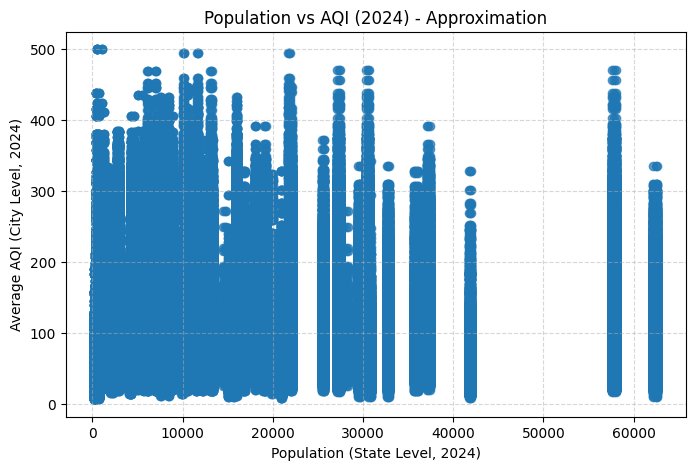

In [135]:
plt.figure(figsize=(8,5))
plt.scatter(merged['value'], merged['aqi_value'], alpha=0.7)
plt.xlabel('Population (State Level, 2024)')
plt.ylabel('Average AQI (City Level, 2024)')
plt.title('Population vs AQI (2024) - Approximation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

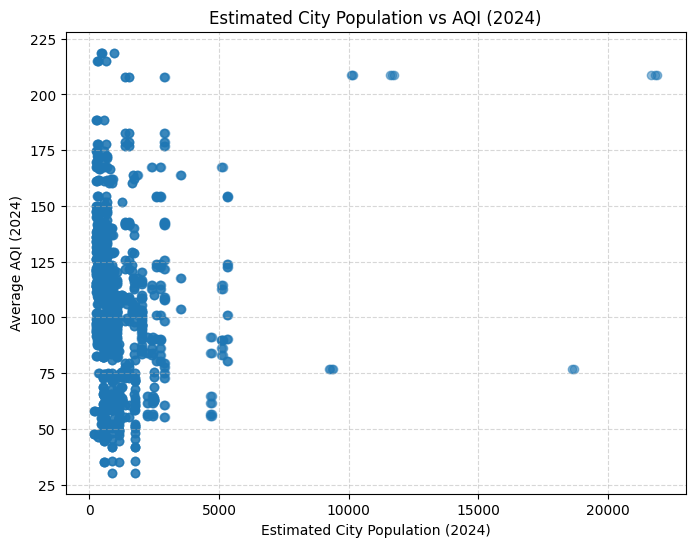

In [141]:


# Assume aqi_df has: ['city', 'state', 'date', 'aqi']
# Assume population_projection has: ['state', 'year', 'population']

# Step 1: Extract year from AQI date
aqi_df_copy['year'] = pd.to_datetime(aqi_df_copy['date']).dt.year

# Step 2: Filter for 2024 data
aqi_2024 = aqi_df_copy[aqi_df_copy['year'] == 2024]
pop_2024 = pop_df_copy[pop_df_copy['year'] == 2024]

# Step 3: Count number of cities in each state (from AQI data)
city_counts = aqi_2024.groupby('state')['area'].nunique().reset_index(name='city_count')

# Step 4: Merge state population with city count
state_pop_with_counts = pop_2024.merge(city_counts, on='state', how='left')

# Step 5: Approximate city population (equal share)
state_pop_with_counts['city_population_est'] = state_pop_with_counts['value'] / state_pop_with_counts['city_count']

# Step 6: Merge back to AQI data
aqi_with_city_pop = aqi_2024.merge(
    state_pop_with_counts[['state', 'city_population_est']],
    on='state',
    how='left'
)

# Step 7: Average AQI per city for 2024
city_aqi_avg = aqi_with_city_pop.groupby(['area', 'city_population_est'])['aqi_value'].mean().reset_index()

# Step 8: Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(city_aqi_avg['city_population_est'], city_aqi_avg['aqi_value'], alpha=0.5)
plt.xlabel('Estimated City Population (2024)')
plt.ylabel('Average AQI (2024)')
plt.title('Estimated City Population vs AQI (2024)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
